<a href="https://colab.research.google.com/github/Sijia022/Image-Reconstruction-and-Colorization-Using-Convolutional-Autoencoder-CAE-/blob/main/CAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 Image Reconstruction**

## **1.Data Preperation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Drop labels and combine train and test data
x_combined = np.concatenate((x_train, x_test), axis=0)

# Split into train, validation, and test sets again
train_images, temp_images = train_test_split(x_combined, test_size=0.2, random_state=42)

val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print("Train shape:", train_images.shape)
print("Validation shape:", val_images.shape)
print("Test shape:", test_images.shape)

Train shape: (48000, 32, 32, 3)
Validation shape: (6000, 32, 32, 3)
Test shape: (6000, 32, 32, 3)


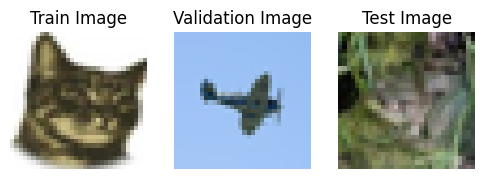

In [ ]:
plt.figure(figsize=(6, 2))

# Display the first image from the train set
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
plt.imshow(train_images[0])
plt.title('Train Image')
plt.axis('off')  # Turn off axis labels

# Display the first image from the validation set
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
plt.imshow(val_images[0])
plt.title('Validation Image')
plt.axis('off')

# Display the first image from the test set
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
plt.imshow(test_images[0])
plt.title('Test Image')
plt.axis('off')
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images_n, val_images_n, test_images_n = train_images / 255.0, val_images/ 255.0, test_images / 255.0

## **2.Build Convolutional Autoencoder**

In [ ]:
class CAE(Model):
  def __init__(self):
    super(CAE, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(12, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 13s 5ms/step - loss: 0.0107 - val_loss: 0.0069
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.

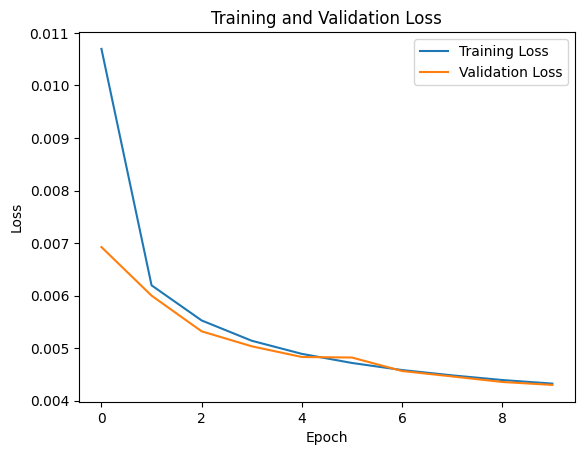

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1744      
                                                                 
Total params: 2844 (11.11 KB)
Trainable params: 2844 (11

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 12)        1740      
 anspose)                                                        
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 3)         327       
 Transpose)                                                      
                                                                 
Total params: 2067 (8.07 KB)
Trainable params: 2067 (8

In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.004270023355582758


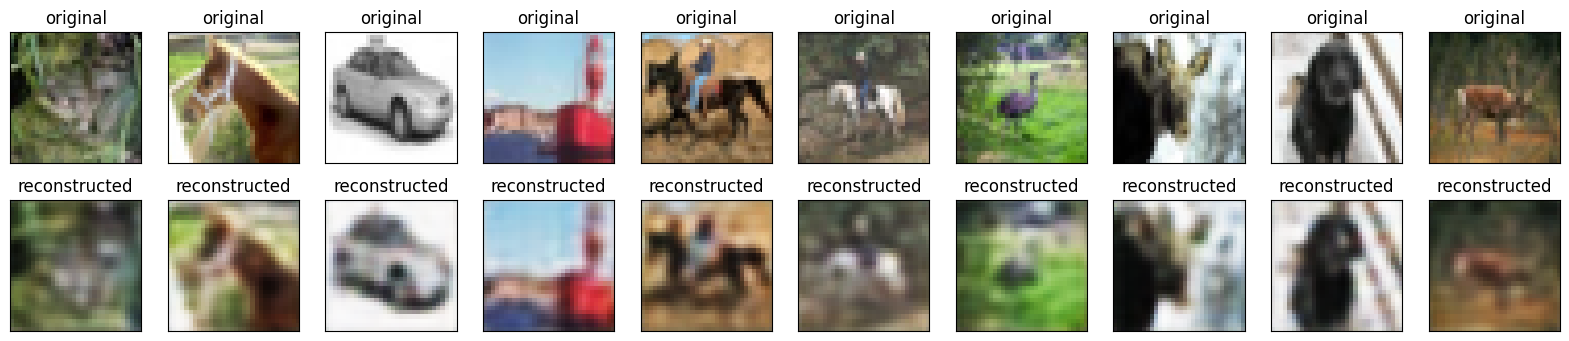

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 2.1 Fewer Intermediate Layers

In [ ]:
class CAE1(Model):
  def __init__(self):
    super(CAE1, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE1()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.001

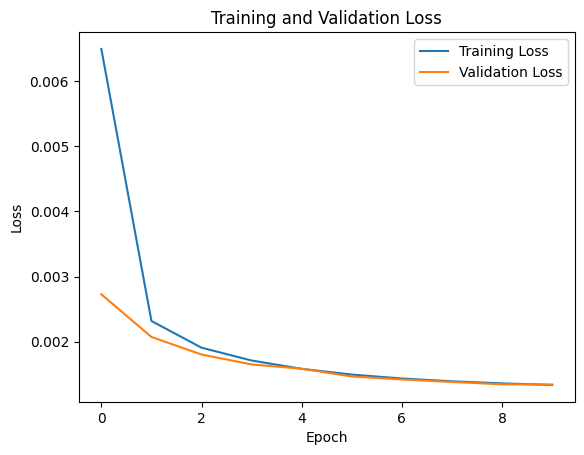

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
Total params: 1100 (4.30 KB)
Trainable params: 1100 (4.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSamplin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 32, 32, 3)         327       
 Transpose)                                                      
                                                                 
Total params: 327 (1.28 KB)
Trainable params: 327 (1.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0013272027370462847


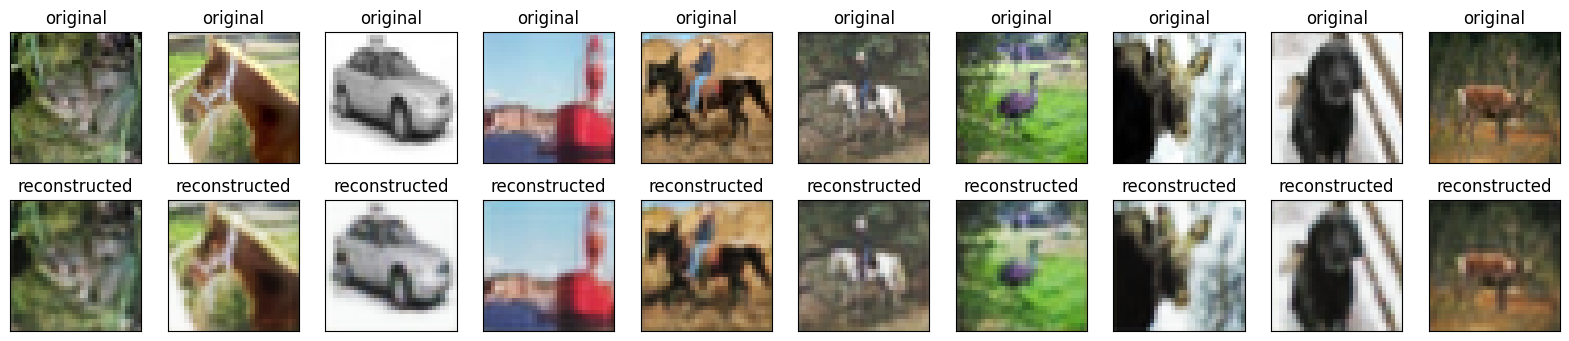

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 2.2 Different Number of Channels

In [ ]:
class CAE2(Model):
  def __init__(self):
    super(CAE2, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(24, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(24, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE2()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.0080 - val_loss: 0.0051
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.00

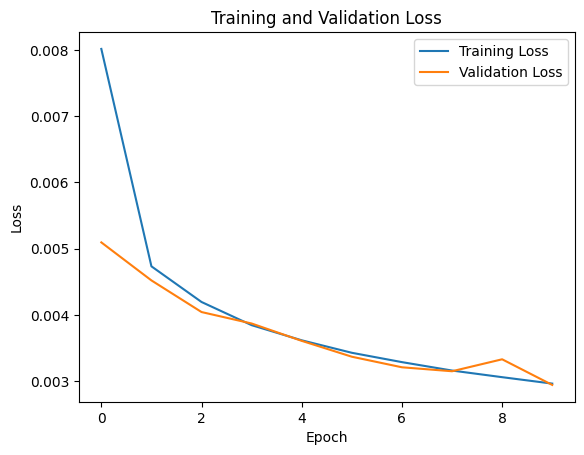

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 24)        3480      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 24)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          6944      
                                                                 
Total params: 10872 (42.47 KB)
Trainable params: 10872

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_3 (UpSamplin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 16, 16, 24)        6936      
 Transpose)                                                      
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 32, 32, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 32, 32, 3)         651       
 Transpose)                                                      
                                                                 
Total params: 7587 (29.64 KB)
Trainable params: 7587 (

In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0029247837995723613


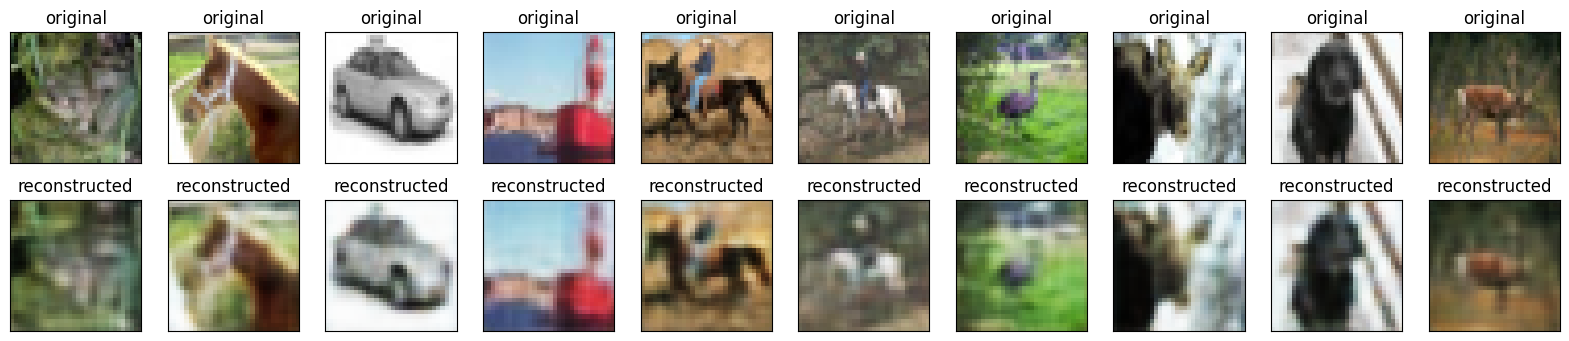

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 2.3 Different Filter Sizes

In [ ]:
class CAE3(Model):
  def __init__(self):
    super(CAE3, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(8, (5, 5), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(12, (5, 5), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(16, (5, 5), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(12, kernel_size=5, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=5, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE3()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.0109 - val_loss: 0.0073
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.00

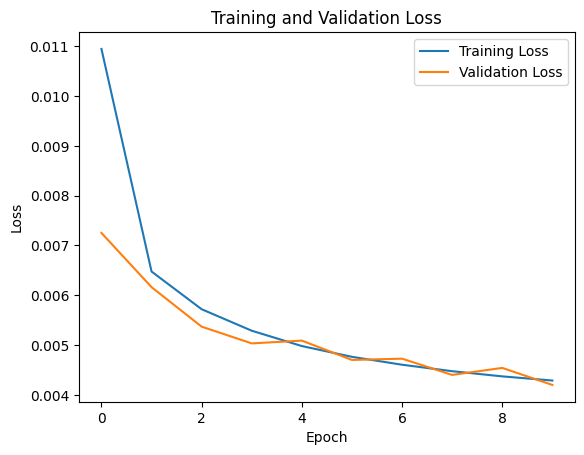

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 12)        2412      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 16)          4816      
                                                                 
Total params: 7836 (30.61 KB)
Trainable params: 7836 (

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_5 (UpSamplin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 16, 16, 12)        4812      
 Transpose)                                                      
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 32, 32, 3)         903       
 Transpose)                                                      
                                                                 
Total params: 5715 (22.32 KB)
Trainable params: 5715 (

In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.004170050546550155


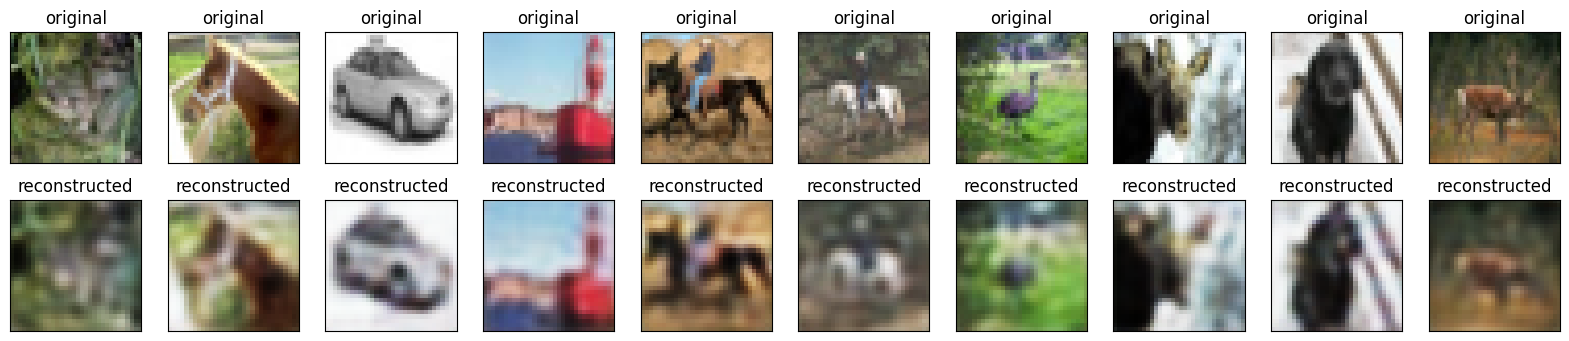

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 2.4 Different Stride Size

In [ ]:
class CAE4(Model):
  def __init__(self):
    super(CAE4, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(12, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE4()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.0212 - val_loss: 0.0166
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0130 - val_loss: 0.0130
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.01

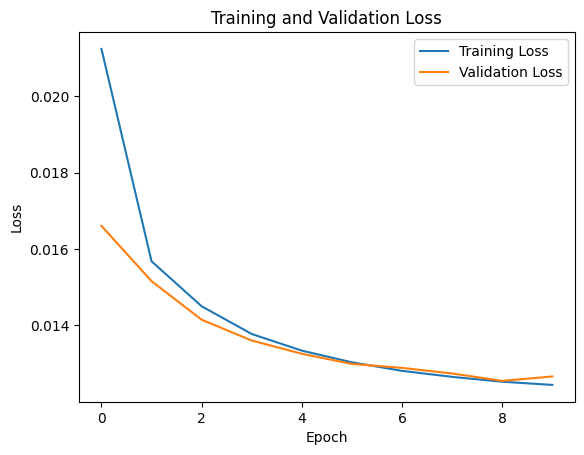

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 16, 16, 8)         224       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 12)          876       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 16)          1744      
                                                                 
Total params: 2844 (11.11 KB)
Trainable params: 2844 (

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_7 (UpSamplin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 8, 8, 12)          1740      
 Transpose)                                                      
                                                                 
 up_sampling2d_8 (UpSamplin  (None, 16, 16, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_8 (Conv2D  (None, 32, 32, 3)         327       
 Transpose)                                                      
                                                                 
Total params: 2067 (8.07 KB)
Trainable params: 2067 (8

In [ ]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.33916655172292093


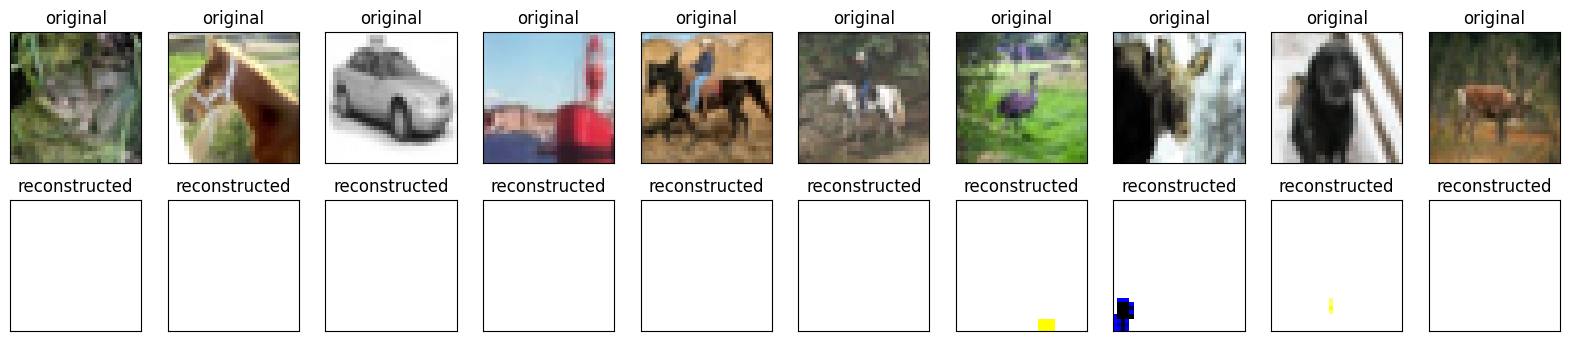

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 2.5 Different Padding Size

In [ ]:
class CAE5(Model):
  def __init__(self):
    super(CAE5, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='valid', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(12, kernel_size=3, strides=1, activation='relu', padding='valid'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE5()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0128 - val_loss: 0.0082
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.005

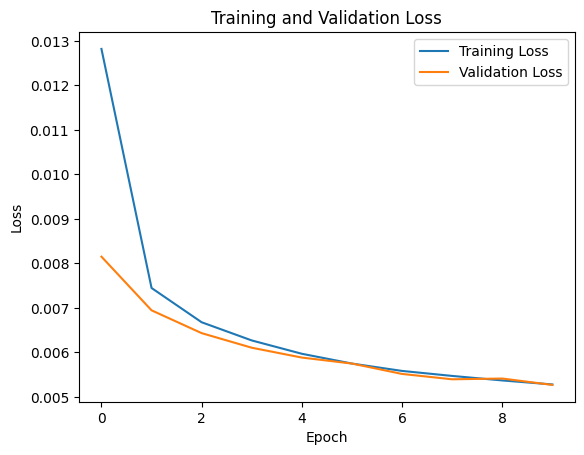

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 12)        876       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 12)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 16)          1744      
                                                                 
Total params: 2844 (11.11 KB)
Trainable params: 2844 

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_11 (UpSampli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_11 (Conv2  (None, 16, 16, 12)        1740      
 DTranspose)                                                     
                                                                 
 up_sampling2d_12 (UpSampli  (None, 32, 32, 12)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_12 (Conv2  (None, 32, 32, 3)         327       
 DTranspose)                                                     
                                                                 
Total params: 2067 (8.07 KB)
Trainable params: 2067 (

In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.005244568978417554


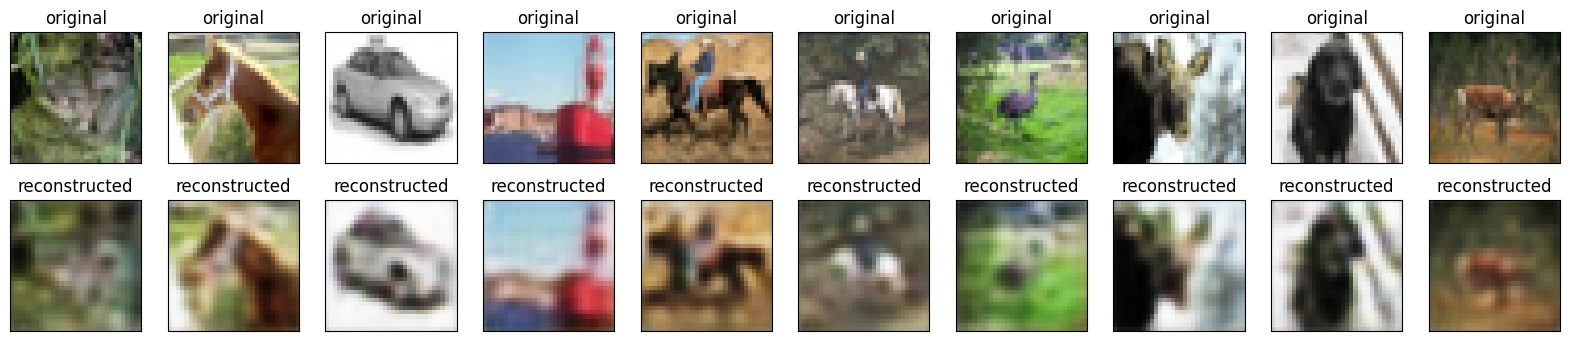

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### **2.6 Final Model**




In [ ]:
class CAE6(Model):
  def __init__(self):
    super(CAE6, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(24, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE6()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0010 - val_loss: 9.6423e-04
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 9.3256e-04 - val_loss: 9.0106e-04
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 8.7289e-04 - val_loss: 9.1462e-04
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 8.3225e-04 - val_loss: 8.0097e-04
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 7.9933e-04 - val_loss: 8.0227e-04
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 7.7200e-04 - val_loss: 8.3438e-04
Epoch 10/10
1500/1500 [===============

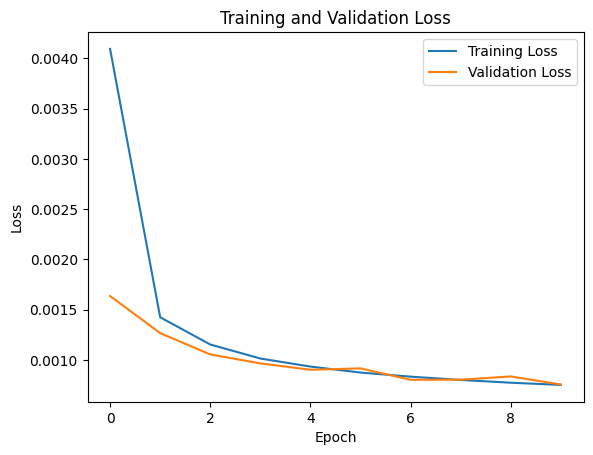

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_n, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_n, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 24)        3480      
                                                                 
Total params: 3928 (15.34 KB)
Trainable params: 3928 (15.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_13 (UpSampli  (None, 32, 32, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_13 (Conv2  (None, 32, 32, 16)        3472      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_14 (Conv2  (None, 32, 32, 3)         435       
 DTranspose)                                                     
                                                                 
Total params: 3907 (15.26 KB)
Trainable params: 3907 (15.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(test_images_n).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0007475993565406964


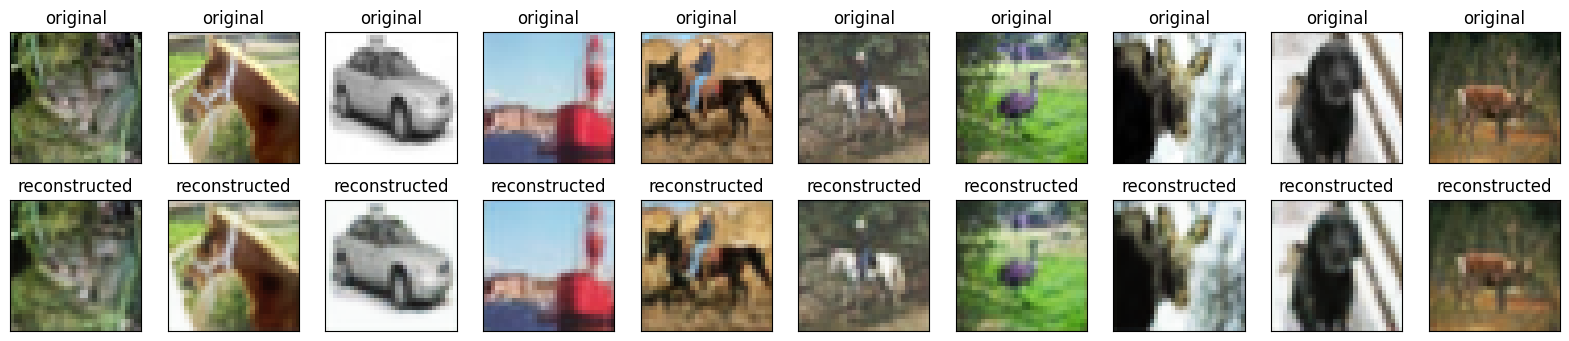

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# **Part 2 Colorization**

## **1.Data Preperation**

In [ ]:
# convert RGB to greyscale as input
import cv2

def rgb_to_gray(image):
  # Convert the image to the appropriate depth (CV_8U)
    image = np.uint8(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

In [ ]:
# Iterate over each RGB image and convert it to grayscale
train_images_gray = [rgb_to_gray(train_image) for train_image in train_images]
val_images_gray = [rgb_to_gray(val_image) for val_image in val_images]
test_images_gray = [rgb_to_gray(test_image) for test_image in test_images]

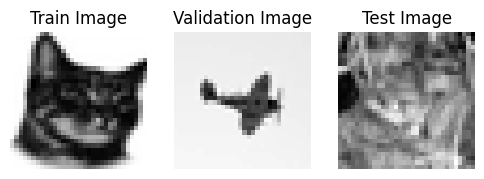

In [ ]:
plt.figure(figsize=(6, 2))

# Display the first image from the train set
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
plt.imshow(train_images_gray[0], cmap='gray')
plt.title('Train Image')
plt.axis('off')  # Turn off axis labels

# Display the first image from the validation set
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
plt.imshow(val_images_gray[0], cmap='gray')
plt.title('Validation Image')
plt.axis('off')

# Display the first image from the test set
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
plt.imshow(test_images_gray[0], cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

In [ ]:
# convert list into numpy array
train_images_gray = np.array(train_images_gray)
val_images_gray = np.array(val_images_gray)
test_images_gray = np.array(test_images_gray)

# Normalize pixel values to be between 0 and 1
train_images_gray, val_images_gray, test_images_gray = train_images_gray / 255.0, val_images_gray/ 255.0, test_images_gray / 255.0

## **2.Build Convolutional Autoencoder**

In [ ]:
# use final model from Part 1 to train first
class CAE_color(Model):
  def __init__(self):
    super(CAE_color, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(24, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(3, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE_color()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 12s 4ms/step - loss: 0.0100 - val_loss: 0.0073
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.00

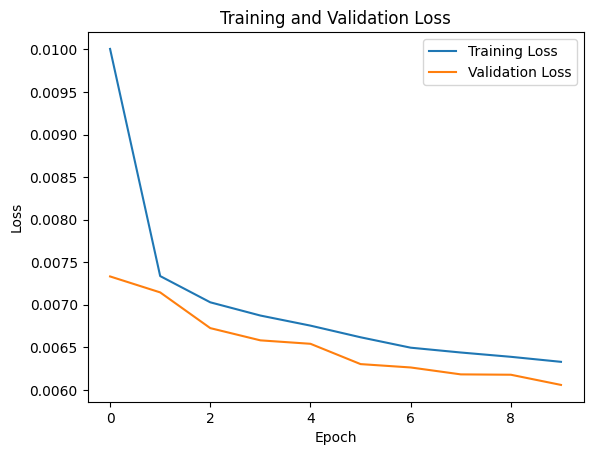

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_gray, train_images_n,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_gray, val_images_n))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 24)        3480      
                                                                 
Total params: 3640 (14.22 KB)
Trainable params: 3640 (14.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 32, 32, 24)        0         
 D)                                                              
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 16)        3472      
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 3)         435       
 Transpose)                                                      
                                                                 
Total params: 3907 (15.26 KB)
Trainable params: 3907 (15.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(test_images_gray).numpy()
decoded_imgs0 = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs0.reshape(decoded_imgs0.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.006158927278836385


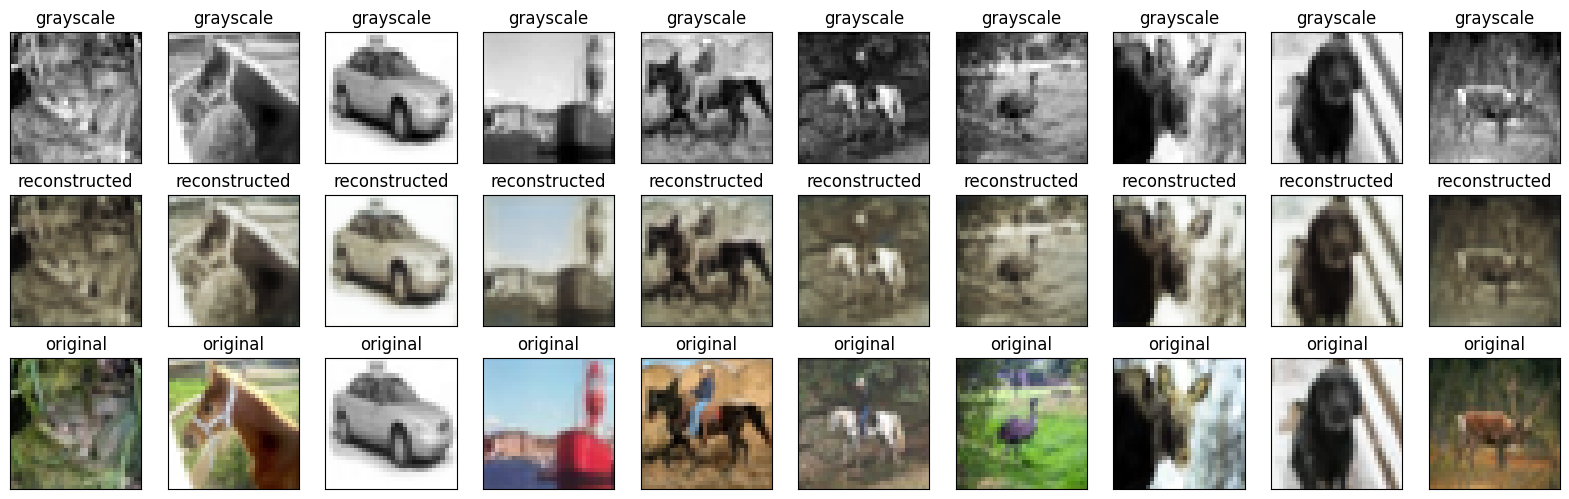

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display grayscale
    ax = plt.subplot(3, n, i + 1)
    plt.title("grayscale")
    plt.imshow(tf.squeeze(test_images_gray[i]),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs0[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # display original
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images[i]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)
plt.show()

###  2.1 Predict Chrominace, then Convert to RBG

#### 2.1.1 Data Preparation

In [ ]:
# convert RBG to YCrCb for chromanice channels
def rgb_to_ycrcb(image):
   # Convert the image to the appropriate depth (CV_8U)
    image = np.uint8(image)
    ycrcb_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return ycrcb_image

In [ ]:
# Iterate over each RGB image and convert it to YCrCb
train_images_ycrcb = [rgb_to_ycrcb(train_image) for train_image in train_images]
val_images_ycrcb = [rgb_to_ycrcb(val_image) for val_image in val_images]
test_images_ycrcb = [rgb_to_ycrcb(test_image) for test_image in test_images]

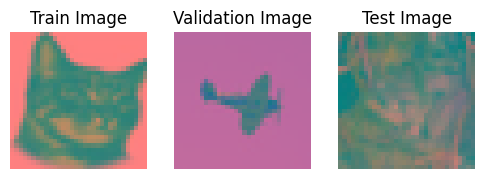

In [ ]:
plt.figure(figsize=(6, 2))

# Display the first image from the train set
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
plt.imshow(train_images_ycrcb[0])
plt.title('Train Image')
plt.axis('off')  # Turn off axis labels

# Display the first image from the validation set
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
plt.imshow(val_images_ycrcb[0])
plt.title('Validation Image')
plt.axis('off')

# Display the first image from the test set
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
plt.imshow(test_images_ycrcb[0])
plt.title('Test Image')
plt.axis('off')
plt.show()

In [ ]:
# extract only Cr and Cb Channels as input
def extract_crcb_channels(ycrcb_image):
    return ycrcb_image[:, :, 1:]

In [ ]:
# Extract Cr and Cb channels
train_images_crcb = [extract_crcb_channels(image) for image in train_images_ycrcb]
val_images_crcb = [extract_crcb_channels(image) for image in val_images_ycrcb]
test_images_crcb = [extract_crcb_channels(image) for image in test_images_ycrcb]

In [ ]:
# convert list into numpy array
train_images_crcb = np.array(train_images_crcb)
val_images_crcb = np.array(val_images_crcb)
test_images_crcb = np.array(test_images_crcb)

# Normalize pixel values to be between 0 and 1
train_images_crcb, val_images_crcb, test_images_crcb = train_images_crcb / 255.0, val_images_crcb/ 255.0, test_images_crcb / 255.0

#### 2.1.2 Build Model

In [ ]:
class CAE_color1(Model):
  def __init__(self):
    super(CAE_color1, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(24, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(2, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE_color1()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.003

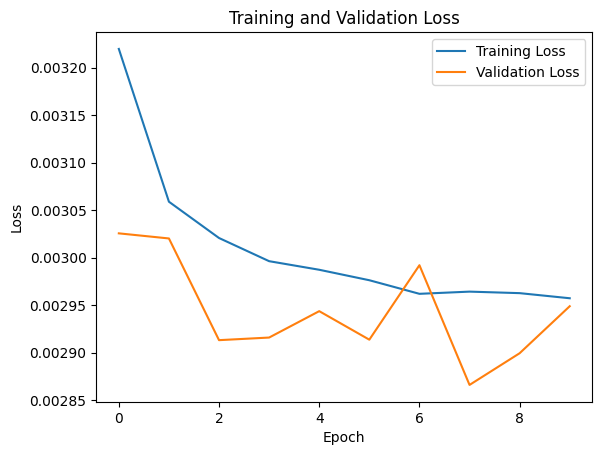

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_gray, train_images_crcb,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_gray, val_images_crcb))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 24)        3480      
                                                                 
Total params: 3640 (14.22 KB)
Trainable params: 3640 (14.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_16 (UpSampli  (None, 32, 32, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_19 (Conv2  (None, 32, 32, 16)        3472      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_20 (Conv2  (None, 32, 32, 2)         290       
 DTranspose)                                                     
                                                                 
Total params: 3762 (14.70 KB)
Trainable params: 3762 (14.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(test_images_gray).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

#### 2.1.3 Convert Back into RGB

In [ ]:
# convert grayscale+CrCb to RGB images
def crcb_to_rgb(gray_image,crcb_image):

    # Scale normalized values back to [0, 255]
    gray_image_scaled = (gray_image * 255).astype(np.uint8)
    crcb_image_scaled = (crcb_image * 255).astype(np.uint8)

    # Duplicate grayscale image to create Y channel
    y_channel = np.expand_dims(gray_image_scaled, axis=-1)

    # Merge Y, Cr, and Cb channels
    ycrcb_image = np.concatenate((y_channel, crcb_image_scaled), axis=-1)

    # Convert YCRCB image to RGB
    rgb_image = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB)
    return rgb_image

In [ ]:
# Iterate over each CrCb and grayscale image and convert it to RGB
decoded_imgs_rgb = [crcb_to_rgb(gray_image, decoded_img) for gray_image, decoded_img in zip(test_images_gray, decoded_imgs)]

In [ ]:
# convert list into numpy array
decoded_imgs_rgb = np.array(decoded_imgs_rgb)

# Normalize pixel values to be between 0 and 1
decoded_imgs_rgb = decoded_imgs_rgb / 255.0

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs_rgb.reshape(decoded_imgs_rgb.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0055757816513213555


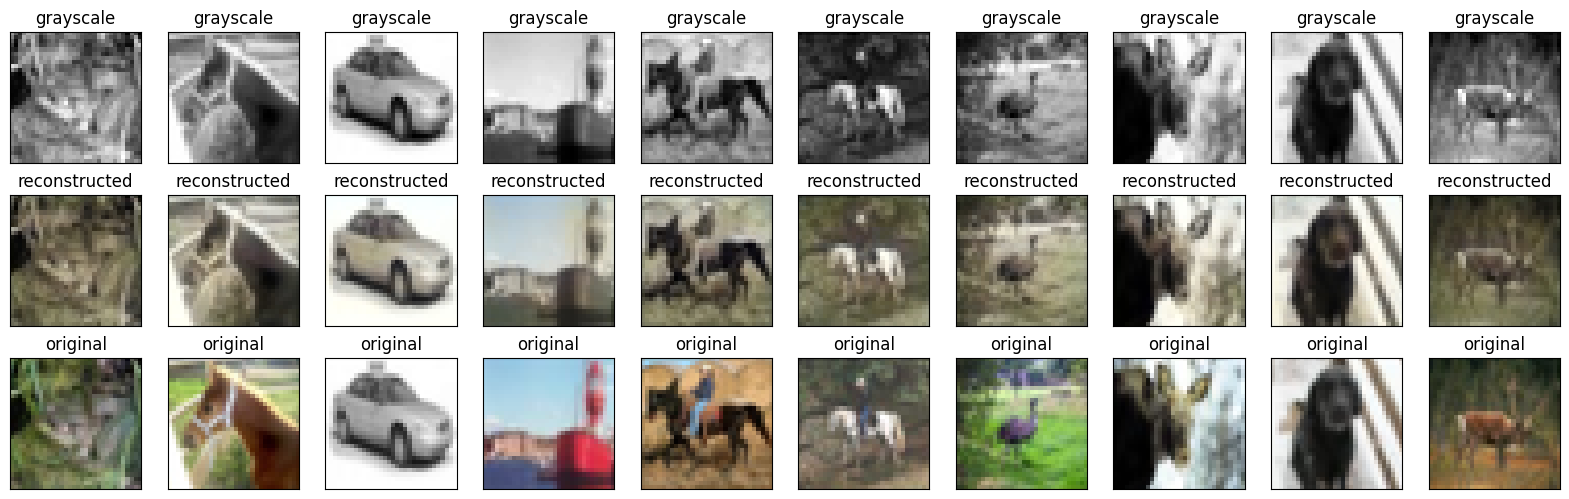

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display grayscale
    ax = plt.subplot(3, n, i + 1)
    plt.title("grayscale")
    plt.imshow(tf.squeeze(test_images_gray[i]),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_rgb[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # display original
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)
plt.show()

### 2.2 Increase Number of channels

#### 2.2.1 Build Model

In [ ]:
class CAE_color2(Model):
  def __init__(self):
    super(CAE_color2, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(2, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE_color2()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.002

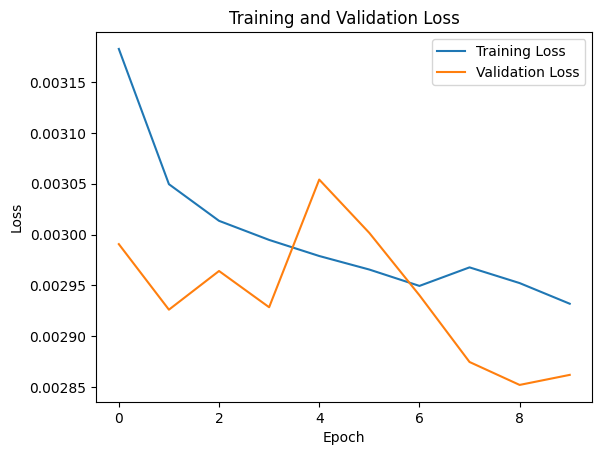

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_gray, train_images_crcb,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_gray, val_images_crcb))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
Total params: 4800 (18.75 KB)
Trainable params: 4800 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_30 (UpSampli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_38 (Conv2  (None, 32, 32, 16)        4624      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_39 (Conv2  (None, 32, 32, 2)         290       
 DTranspose)                                                     
                                                                 
Total params: 4914 (19.20 KB)
Trainable params: 4914 (19.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(test_images_gray).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

#### 2.2.2 Convert Back into RGB

In [ ]:
# Iterate over each CrCb and grayscale image and convert it to RGB
decoded_imgs_rgb = [crcb_to_rgb(gray_image, decoded_img) for gray_image, decoded_img in zip(test_images_gray, decoded_imgs)]

In [ ]:
# convert list into numpy array
decoded_imgs_rgb = np.array(decoded_imgs_rgb)

# Normalize pixel values to be between 0 and 1
decoded_imgs_rgb = decoded_imgs_rgb / 255.0

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs_rgb.reshape(decoded_imgs_rgb.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.005380972482538784


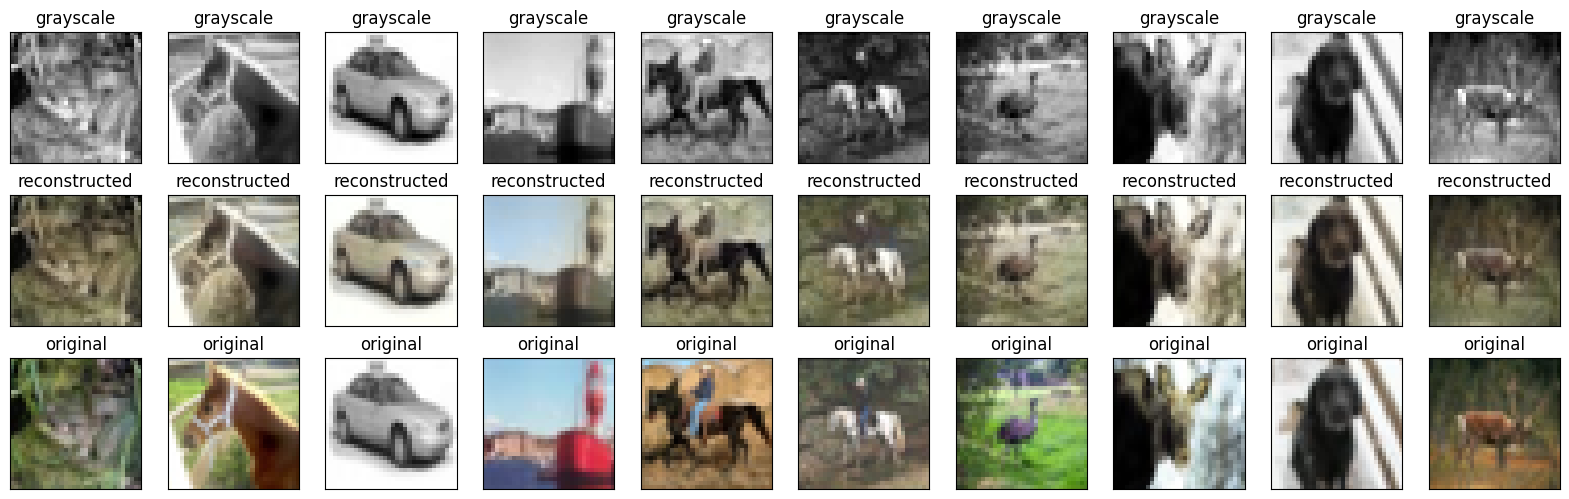

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display grayscale
    ax = plt.subplot(3, n, i + 1)
    plt.title("grayscale")
    plt.imshow(tf.squeeze(test_images_gray[i]),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_rgb[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # display original
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)
plt.show()

### 2.3 Increase the Depth of the Model

#### 2.3.1 Build Model

In [ ]:
class CAE_color3(Model):
  def __init__(self):
    super(CAE_color3, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(24, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(32, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(24, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(2, kernel_size=3, strides=1, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CAE_color3()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0

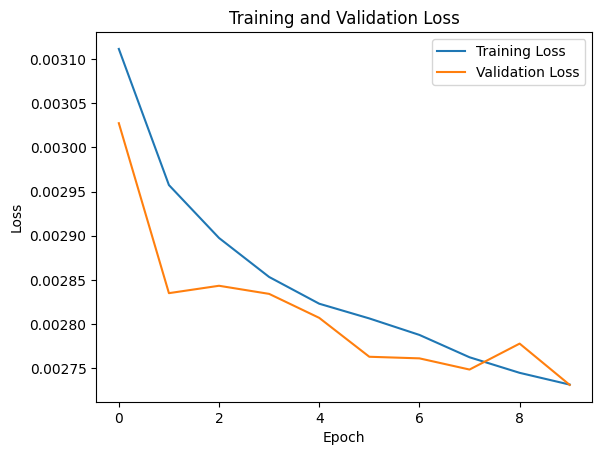

In [ ]:
# Train the autoencoder and obtain the training history
history = autoencoder.fit(train_images_gray, train_images_crcb,
                           epochs=10,
                           shuffle=True,
                           validation_data=(val_images_gray, val_images_crcb))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 24)        3480      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 24)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          6944      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 32)         

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_1 (UpSamplin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 8, 8, 32)          18464     
 Transpose)                                                      
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 16, 16, 24)        6936      
 Transpose)                                                      
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 32, 32, 24)       

In [ ]:
encoded_imgs = autoencoder.encoder(test_images_gray).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

#### 2.3.2 Convert Back into RGB

In [ ]:
# Iterate over each CrCb and grayscale image and convert it to RGB
decoded_imgs_rgb = [crcb_to_rgb(gray_image, decoded_img) for gray_image, decoded_img in zip(test_images_gray, decoded_imgs)]

In [ ]:
# convert list into numpy array
decoded_imgs_rgb = np.array(decoded_imgs_rgb)

# Normalize pixel values to be between 0 and 1
decoded_imgs_rgb = decoded_imgs_rgb / 255.0

In [ ]:
# Reshape or flatten the arrays if they are multi-dimensional
test_images_n_flat = test_images_n.reshape(test_images_n.shape[0], -1)
decoded_imgs_flat = decoded_imgs_rgb.reshape(decoded_imgs_rgb.shape[0], -1)

# Calculate the mean squared error
mse = mean_squared_error(test_images_n_flat, decoded_imgs_flat)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0051007477901461665


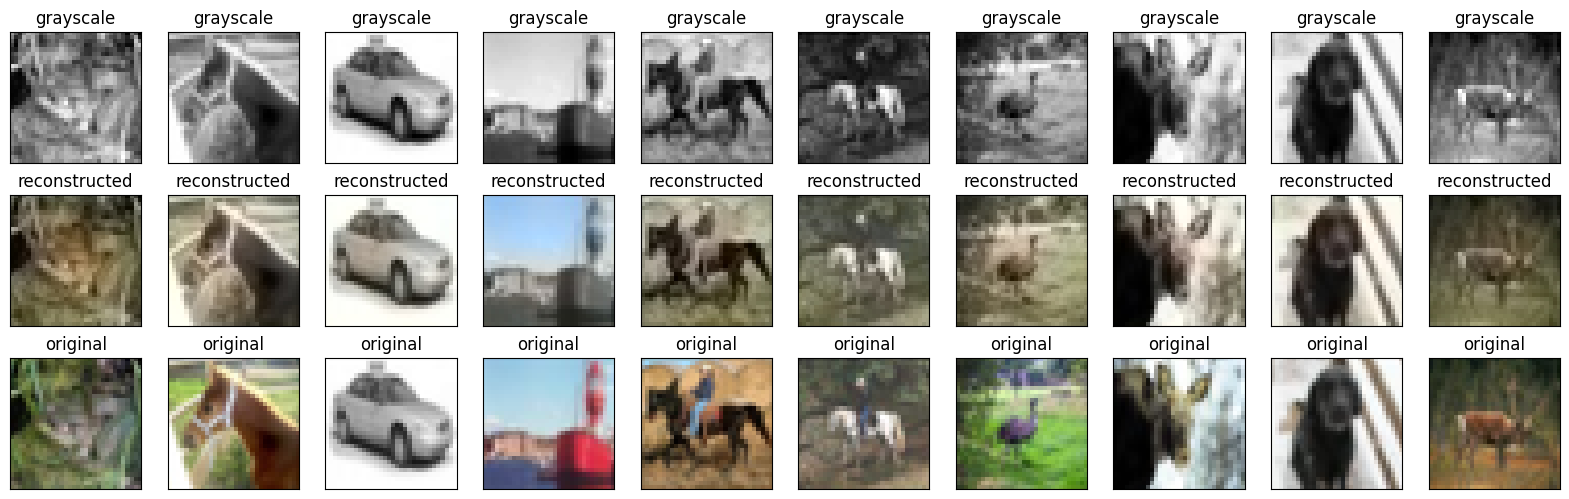

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display grayscale
    ax = plt.subplot(3, n, i + 1)
    plt.title("grayscale")
    plt.imshow(tf.squeeze(test_images_gray[i]),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_rgb[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # display original
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)
plt.show()

## 3.Comparison

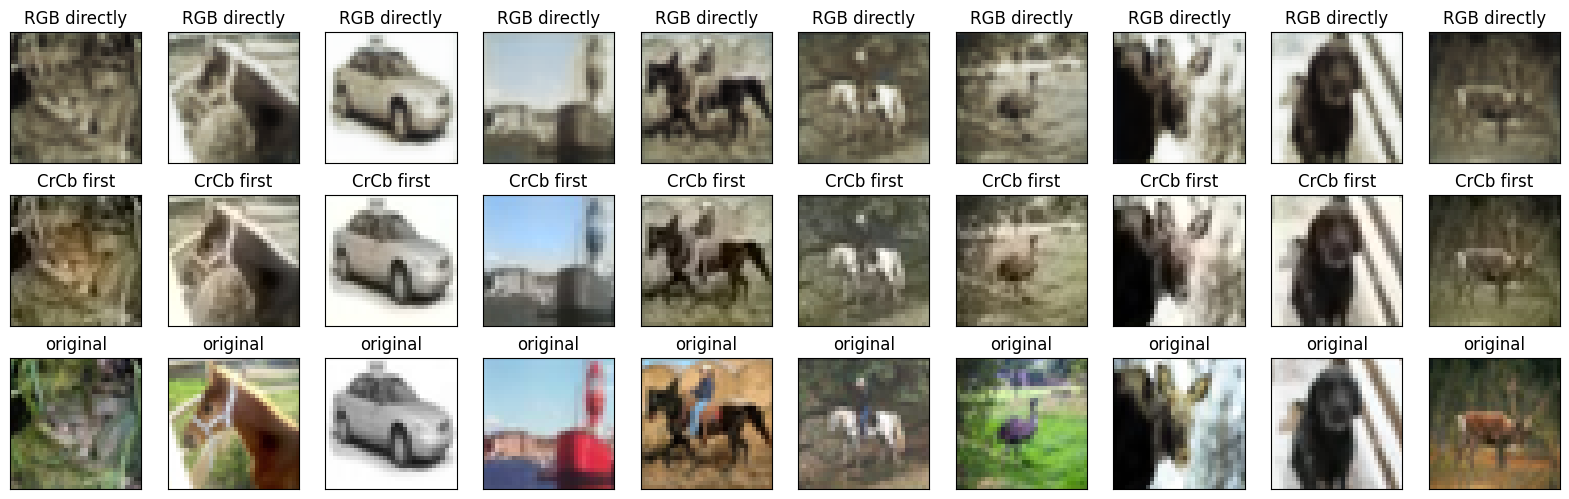

In [ ]:
# compare the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display grayscale
    ax = plt.subplot(3, n, i + 1)
    plt.title("RGB directly")
    plt.imshow(tf.squeeze(decoded_imgs0[i]),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("CrCb first")
    plt.imshow(tf.squeeze(decoded_imgs_rgb[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # display original
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images_n[i]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)
plt.show()